# 1. 선형회귀란

## 1) K 최근접의 한계 
  - 존재하는 데이터만을 이용해 예측을 함 
  - 훈련 세트에 없는 데이터는 잘 예측하지 못함

## 2) 정의
- 특성과 타깃 사이의 관계를 나타내는 선형 방정식 


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Matplotlib의 전역 폰트 설정
plt.rc('font', family='Pretendard')

# 마이너스 부호가 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)


## 3) 데이터 준비 

In [30]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 훈련세트와 테스트 세트로 나눔 
train_input, test_input,train_traget,test_target = train_test_split(perch_length,perch_weight)

### 데이터 전처리 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 2. 선형회귀 모델 
- 선형 회귀 모델은 $y=ax+b$ 와 같은 형태
- `coef_` : 계수 혹은 가중치 
- `intercept_` : b

## 1) 선형 회귀를 통한 예측

In [31]:
### 객체 선언 
lr = LinearRegression()

### 모델 훈련
lr.fit(train_input,train_traget)

### 모델 평가 
print(f"모델 평가 :  {lr.score(test_input,test_target)}")

### 모델 예측 - [50,150]
print(f"50cm 도미 무게 예측 : {lr.predict([[50]])}")

모델 평가 :  0.8734052233220679
50cm 도미 무게 예측 : [1200.23081311]


- 선형 회귀의 절편과 기울기 확인

In [32]:
print("기울기 : ",lr.coef_,"절편 : ", lr.intercept_)

기울기 :  [37.55628514] 절편 :  -677.5834440237791


- 시각화 

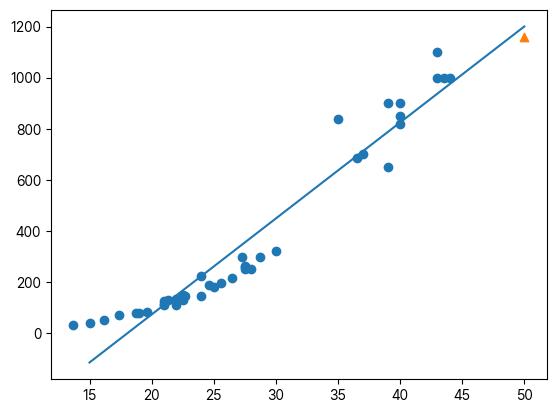

In [33]:
plt.scatter(train_input,train_traget)

### 선형 회귀식을 그림 
### 15~50cm 범위에서 
### 선형회귀 식에 15~50을 넣은 선을 그림 
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

### 50cm 농어 데이터 추가 
plt.scatter(50,1160.11866689,marker="^")
plt.xlabel="length"
plt.ylabel="weight"
plt.show()

## 2) 모델 평가 

- $R^2$ 값 
  -  R 값이 너무 적음(과대 적합이라기에는 너무 적음)
  -  모델이 데이터를 잘 설명 하지 못함 

In [34]:
print("훈련 데이터 R Squard 값 : ", lr.score(train_input,train_traget))
print("테스트 데이터 R Squard 값 : ", lr.score(test_input,test_target))

훈련 데이터 R Squard 값 :  0.9335884983087648
테스트 데이터 R Squard 값 :  0.8734052233220679


# 3. 다항회귀 
- 다항식을 이용하여 특성과 타겟 싸이의 관계를 나타냄 
- 비선형임에도 선형으로 표현 가능 
- 모델 파라미터 : 선형 회귀가 찾은 가중치 처럼 머신러닝이 특성에서 학습한 파라미터

## 1) 다항 회귀를 통한 예측 

- 다항식으로 변경 
  - 농어의 길이를 제곱
  - $\text{무게} = a \cdot \text{길이}^2  + b \cdot \text{길이} + c $

In [35]:
### 제곱한 훈련 / 테스트 세트
train_poly = np.column_stack((train_input ** 2 , train_input))
test_poly = np.column_stack((test_input ** 2 , test_input))

print("제곱했기때문에 2차원으로 바뀜 : ", train_poly.shape , test_poly.shape)

제곱했기때문에 2차원으로 바뀜 :  (42, 2) (14, 2)


- 모델 훈련 및 평가

In [36]:
lr  = LinearRegression()
lr.fit(train_poly,train_traget)

print("예측 값 : ",lr.predict([[50**2, 50 ]]))

예측 값 :  [1516.61549337]


- 기울기와 절편 확인

In [37]:
print("기울기 : ",lr.coef_,"절편 : ", lr.intercept_)

기울기 :  [  0.98243685 -21.30289923] 절편 :  125.6683369599827


- 시각화 

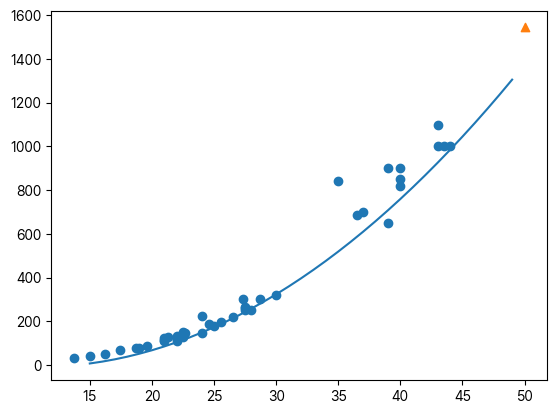

In [38]:
plt.scatter(train_input,train_traget)

point = np.arange(15,50)
plt.plot(point, 0.9*point**2 - 19.4*point + 95.5)

### 50cm 농어 데이터 추가 
plt.scatter(50,1544.47753912,marker="^")
plt.xlabel="length"
plt.ylabel="weight"
plt.show()

- $R^2$ 값 
  -  R 값 상승 
  -  다소 고소 적합 

In [39]:
print("훈련 데이터 R Squard 값 : ", lr.score(train_poly,train_traget))
print("테스트 데이터 R Squard 값 : ", lr.score(test_poly,test_target))

훈련 데이터 R Squard 값 :  0.9713239494394543
테스트 데이터 R Squard 값 :  0.9697999527566622
